In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

C:\Users\vedan\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('merged_5s (1).csv')

In [3]:
df.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,53913,216.58.208.46,80,6,435,0.0,4597.701149,435.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
1,10.0.2.16,53913,216.58.208.46,80,6,259,0.0,7722.007722,259.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
2,10.0.2.17,53913,216.58.208.46,80,6,891,0.0,2244.668911,891.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
3,10.0.2.18,53913,216.58.208.46,80,6,1074,0.0,1862.197393,1074.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
4,10.0.2.19,53913,216.58.208.46,80,6,315,0.0,6349.206349,315.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


In [4]:
df.tail()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
84182,131.202.240.64,138,131.202.243.255,138,17,1,475000000.0,2000000.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
84183,131.202.240.64,138,131.202.243.255,138,17,1,475000000.0,2000000.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
84184,131.202.240.64,138,131.202.243.255,138,17,1,475000000.0,2000000.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
84185,131.202.240.64,138,131.202.243.255,138,17,1,475000000.0,2000000.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
84186,131.202.240.157,68,255.255.255.255,67,17,1,600000000.0,2000000.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


In [5]:
df.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,84187.000000,84187.000000,84187.000000,8.418700e+04,8.418700e+04,8.418700e+04,8.418700e+04,8.418700e+04,8.418700e+04,8.418700e+04,...,8.418700e+04,8.418700e+04,8.418700e+04,84187.0,8.418700e+04,8.418700e+04,8.418700e+04,84187.0,8.418700e+04,8.418700e+04
mean,36550.228301,13160.176868,11.709254,1.976607e+06,2.693915e+05,2.767573e+03,2.346052e+05,1.060376e+05,5.085978e+05,1.692820e+05,...,2.699241e+05,3.730559e+04,1.879872e+04,0.0,1.879872e+04,1.879872e+04,1.585344e+05,0.0,1.585344e+05,1.585344e+05
std,21514.235930,19548.441624,5.496051,2.143445e+06,5.147994e+06,4.374423e+04,5.300590e+05,2.847779e+05,8.607961e+05,5.012896e+05,...,6.769899e+05,2.461099e+05,1.437125e+05,0.0,1.437125e+05,1.437125e+05,7.604078e+05,0.0,7.604078e+05,7.604078e+05
min,21.000000,21.000000,6.000000,1.000000e+00,0.000000e+00,4.000000e-01,5.000000e-01,0.000000e+00,1.000000e+00,-2.255000e+03,...,0.000000e+00,-3.270000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,15685.000000,137.000000,6.000000,1.111290e+05,1.068137e+02,4.874708e+00,9.874521e+03,0.000000e+00,3.543650e+04,1.900000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
50%,42382.000000,443.000000,17.000000,4.207650e+05,1.951995e+03,2.963630e+01,4.654067e+04,3.955367e+03,1.557300e+05,4.940000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
75%,54420.000000,19302.000000,17.000000,4.838640e+06,2.595854e+04,1.039026e+02,3.336732e+05,4.639167e+04,4.427965e+05,1.358960e+05,...,1.216835e+05,4.400000e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
max,65534.000000,65514.000000,17.000000,5.000000e+06,6.000000e+08,3.000000e+06,5.000000e+06,3.535258e+06,5.000000e+06,5.000000e+06,...,4.998709e+06,4.998709e+06,2.447136e+06,0.0,2.447136e+06,2.447136e+06,5.000000e+06,0.0,5.000000e+06,5.000000e+06


In [6]:
df.dtypes

Source IP            object
Source Port           int64
Destination IP       object
Destination Port      int64
Protocol              int64
Flow Duration         int64
Flow Bytes/s        float64
Flow Packets/s      float64
Flow IAT Mean       float64
Flow IAT Std        float64
Flow IAT Max          int64
Flow IAT Min          int64
Fwd IAT Mean        float64
Fwd IAT Std         float64
Fwd IAT Max           int64
Fwd IAT Min           int64
Bwd IAT Mean        float64
Bwd IAT Std         float64
Bwd IAT Max           int64
Bwd IAT Min           int64
Active Mean           int64
Active Std            int64
Active Max            int64
Active Min            int64
Idle Mean             int64
Idle Std              int64
Idle Max              int64
Idle Min              int64
label                object
dtype: object

In [7]:
df['Flow Duration'] = df['Flow Duration'].astype(float)
df['Flow IAT Max'] = df['Flow IAT Max'].astype(float)
df['Flow IAT Min'] = df['Flow IAT Min'].astype(float)
df['Fwd IAT Max'] = df['Fwd IAT Max'].astype(float)
df['Fwd IAT Min'] = df['Fwd IAT Min'].astype(float)
df['Bwd IAT Max'] = df['Bwd IAT Max'].astype(float)
df['Bwd IAT Min'] = df['Bwd IAT Min'].astype(float)
df['Active Mean'] = df['Active Mean'].astype(float)
df['Active Mean'] = df['Active Mean'].astype(float)
df['Active Std'] = df['Active Std'].astype(float)
df['Active Max'] = df['Active Max'].astype(float)
df['Active Min'] = df['Active Min'].astype(float)
df['Idle Mean'] = df['Idle Mean'].astype(float)
df['Idle Std'] = df['Idle Std'].astype(float)
df['Idle Max'] = df['Idle Max'].astype(float)
df['Idle Min'] = df['Idle Min'].astype(float)



In [8]:
df.dtypes

Source IP            object
Source Port           int64
Destination IP       object
Destination Port      int64
Protocol              int64
Flow Duration       float64
Flow Bytes/s        float64
Flow Packets/s      float64
Flow IAT Mean       float64
Flow IAT Std        float64
Flow IAT Max        float64
Flow IAT Min        float64
Fwd IAT Mean        float64
Fwd IAT Std         float64
Fwd IAT Max         float64
Fwd IAT Min         float64
Bwd IAT Mean        float64
Bwd IAT Std         float64
Bwd IAT Max         float64
Bwd IAT Min         float64
Active Mean         float64
Active Std          float64
Active Max          float64
Active Min          float64
Idle Mean           float64
Idle Std            float64
Idle Max            float64
Idle Min            float64
label                object
dtype: object

In [9]:
df.columns

Index(['Source IP', 'Source Port', 'Destination IP', 'Destination Port',
       'Protocol', 'Flow Duration', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min', 'label'],
      dtype='object')

In [10]:
x = ['Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min']
y = ['label']

In [11]:
print(x)
print(y)

['Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
['label']


In [12]:
df['label'].value_counts()

nonTOR    69680
TOR       14507
Name: label, dtype: int64

In [13]:
#scaling data in x variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
cols = df.select_dtypes(include=['float64']).columns
df_train = scaler.fit_transform(df.select_dtypes(include=['float64']))

In [15]:
sc_df = pd.DataFrame(df_train,columns=cols)

In [16]:
#encoding data in y variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
catdf = df.select_dtypes(include=['object']).copy()
traincatdf = catdf.apply(encoder.fit_transform)

#dropping label column from main data set
enctrain = traincatdf.drop(['label'],axis=1)

#copying the "label" column to variable
cat_train = traincatdf[['label']].copy()

In [17]:
new_x = pd.concat([sc_df,enctrain], axis=1)
new_y = cat_train
print(new_x.shape)
print(new_y.shape)

(84187, 25)
(84187, 1)


In [18]:
print(new_x)
print(new_y)

       Flow Duration  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  \
0          -0.921966     -0.052330        0.041837      -0.441784   
1          -0.922048     -0.052330        0.113260      -0.442116   
2          -0.921753     -0.052330       -0.011954      -0.440924   
3          -0.921668     -0.052330       -0.020697      -0.440578   
4          -0.922022     -0.052330        0.081877      -0.442010   
...              ...           ...             ...            ...   
84182      -0.922169     92.217163       45.657317      -0.442603   
84183      -0.922169     92.217163       45.657317      -0.442603   
84184      -0.922169     92.217163       45.657317      -0.442603   
84185      -0.922169     92.217163       45.657317      -0.442603   
84186      -0.922169    116.498608       45.657317      -0.442603   

       Flow IAT Std  Flow IAT Max  Flow IAT Min  Fwd IAT Mean  Fwd IAT Std  \
0         -0.372354     -0.590344     -0.336827     -0.439783    -0.350452   
1         -0.37

In [19]:
#Undersampling the data so that majority class observations match with minority class 
non_tor = new_y.loc[new_y['label']==1].sample(frac = .75)
tor = new_y.loc[new_y['label']==0]
normalized_df = pd.concat([non_tor,tor])

In [20]:
print(non_tor)
print(tor)

       label
30002      1
62076      1
41312      1
55503      1
37704      1
...      ...
36314      1
73684      1
32171      1
34174      1
65845      1

[52260 rows x 1 columns]
       label
8407       0
8408       0
8409       0
8410       0
8411       0
...      ...
84105      0
84111      0
84114      0
84117      0
84122      0

[14507 rows x 1 columns]


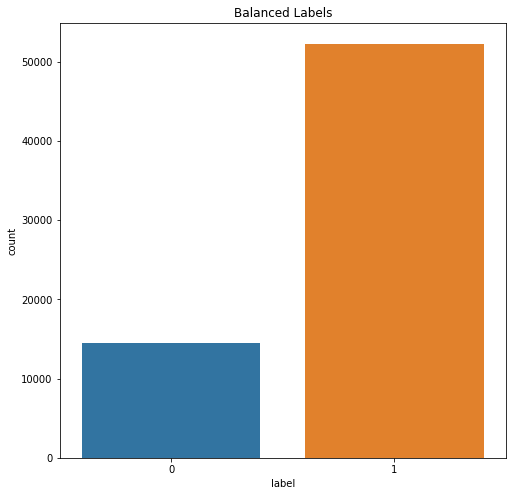

In [21]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.countplot('label', data = normalized_df)
plt.title('Balanced Labels')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.40, random_state=42)

In [24]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [34]:
#using logistic regression
starttime = time.time()
LGR_classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_classifier.fit(x_train,y_train)
endtime = time.time()
training_time = endtime-starttime
print(training_time)

2.4403417110443115


In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LGR_classifier, x_train, y_train, cv=10)
print(scores)
answers = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

[0.87628662 0.86718131 0.87569279 0.86995249 0.87408434 0.86953079
 0.87388636 0.87507424 0.88138614 0.8750495 ]


(0.867181314330958, 0.8738124593629198, 0.8813861386138614)

In [38]:
#SVM with radial based kernel
starttime = time.time()
SVM_classifier1 = SVC(kernel='rbf', random_state=0)
SVM_classifier1.fit(x_train,y_train)
endtime = time.time()
training_time = endtime-starttime
print(training_time)

109.98864197731018


In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVM_classifier1, x_train, y_train, cv=10)
print(scores)
answers = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

[0.99901029 0.99920823 0.99920823 0.99920823 0.99960404 0.99920808
 0.99940606 0.99940606 0.9990099  0.99920792]


(0.999009900990099, 0.9992477050648534, 0.9996040388041972)

In [39]:
#SVM with sigmoid kernel
starttime = time.time()
SVM_classifier2 = SVC(kernel='sigmoid', random_state = 0)
SVM_classifier2.fit(x_train,y_train)
endtime = time.time()
training_time = endtime-starttime
print(training_time)

48.46939516067505


In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVM_classifier2, x_train, y_train, cv=10)
print(scores)
answers = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

[0.82858274 0.82858274 0.82858274 0.82858274 0.8285488  0.8285488
 0.8285488  0.8285488  0.82871287 0.82871287]


(0.8285488022173827, 0.8285951909480209, 0.8287128712871287)

In [41]:
from sklearn import metrics
models = []
models.append(('Logistic regression classifier', LGR_classifier))
models.append(('Support Vector Machine(Radial)', SVM_classifier1))
models.append(('Support Vector Machine(Sigmoidal)', SVM_classifier1)) 


for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(x_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(x_test))
    classification = metrics.classification_report(y_test, v.predict(x_test))
    
    print('------------ {} Model Evaluation -----------'.format(i))
    print()
    print("Model Accuracy: ")
    print(accuracy)
    print()
    print("Confusion Matrix: ")
    print(confusion_matrix)
    print()
    print("Classification Report: ")
    print(classification)
    print()

------------ Logistic regression classifier Model Evaluation -----------

Model Accuracy: 
0.86913140311804

Confusion Matrix: 
[[ 4116  1733]
 [ 2674 25152]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.61      0.70      0.65      5849
           1       0.94      0.90      0.92     27826

    accuracy                           0.87     33675
   macro avg       0.77      0.80      0.79     33675
weighted avg       0.88      0.87      0.87     33675


------------ Support Vector Machine(Radial) Model Evaluation -----------

Model Accuracy: 
0.9994654788418709

Confusion Matrix: 
[[ 5831    18]
 [    0 27826]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5849
           1       1.00      1.00      1.00     27826

    accuracy                           1.00     33675
   macro avg       1.00      1.00      1.00     33675
weighted avg       1.00      1